# **EDA**

#### **Install Required Libraries**
* pip install pandas numpy

## **Loading and Inspecting the Dataset**

* Create the folder named data and move **Synthetic_Financial_datasets_log.csv** in that folder.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset (use a relative path)
df = pd.read_csv("./data/Synthetic_Financial_datasets_log.csv")

# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())

# Display first few rows
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None

First 5 Rows of the Dataset:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT 

## **Dataset Overview**

### Key Insights:
- The dataset contains **6,362,620** transactions with **11 columns**.
- No missing values were found in any of the columns.
- The dataset includes **both numerical and categorical features**:
  - **Numerical Columns:** `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`
  - **Categorical Columns:** `type`, `nameOrig`, `nameDest`
  - **Target Variable:** `isFraud` (Binary: 0 = Not Fraud, 1 = Fraud)
- The `type` column indicates different transaction types (e.g., PAYMENT, TRANSFER, CASH_OUT).
- The `oldbalanceOrg` and `newbalanceOrig` represent the **balance before and after transactions**.


## **Summary Statistics**

In [2]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check the percentage of fraudulent transactions
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100
print("\nPercentage of Fraudulent Transactions:")
print(fraud_percentage)



Summary Statistics:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.00000

### Key Insights:
- The dataset contains **6,362,620 transactions**.
- The **average transaction amount** is **$179,861.90**, but the **maximum transaction** reaches **$92.4 million**.
- **Account balance values vary significantly** with high standard deviations, indicating a large range in transaction values.
- **Many accounts have a zero balance before and after transactions**, suggesting possible fraud patterns.
- **Fraudulent transactions make up only 0.13%** of the dataset, indicating a severe class imbalance.

### Fraud Class Imbalance:
- **99.87% of transactions are non-fraudulent**.
- **Only 0.13% of transactions are fraudulent**, meaning **fraud detection models must handle extreme imbalance carefully**.

## **Visualizing Fraud Distribution**

#### **Install Required Libraries**
* pip install matplotlib seaborn

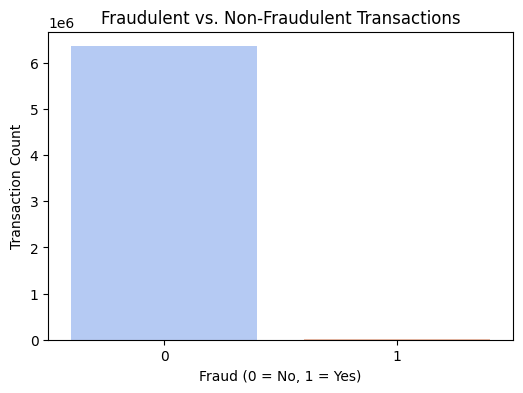

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(6,4))

# Correct way to assign hue to remove warning
sns.countplot(data=df, x='isFraud', hue='isFraud', palette="coolwarm", legend=False)

# Add labels and title
plt.title("Fraudulent vs. Non-Fraudulent Transactions")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Count")

# Show plot
plt.show()


## **Fraudulent vs. Non-Fraudulent Transactions**

### Key Insights:
- The dataset has a **severe class imbalance**.
- **99.87% of transactions are non-fraudulent**, while **only 0.13% are fraudulent**.
- Fraud detection models will need **resampling techniques (Oversampling/Undersampling) or weighting methods** to handle this imbalance.
- Fraud cases are visually **almost negligible** compared to non-fraud cases.

## **Fraud Distribution by Transaction Type**

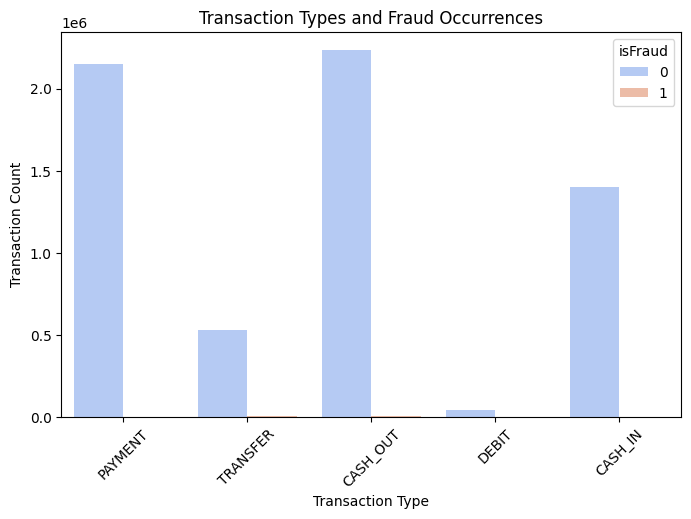

In [5]:
# Fraud Distribution Across Transaction Types
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', hue='isFraud', palette="coolwarm")
plt.title("Transaction Types and Fraud Occurrences")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


### Key Insights:
- Fraud is **highly concentrated** in **TRANSFER and CASH_OUT transactions**.
- **PAYMENT and CASH_IN transactions** have almost **no fraud cases**.
- **TRANSFER and CASH_OUT are riskier transactions**, often used for money laundering and fraud.
- Fraud detection models should **prioritize monitoring and flagging these transaction types**.

## **Analyzing Transaction Amounts by Fraud Status**

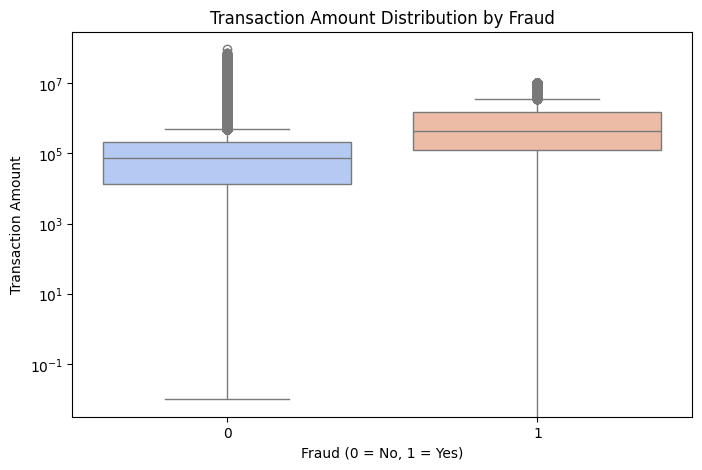

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(8,5))

# Correct way to assign hue to remove warning
sns.boxplot(data=df, x='isFraud', y='amount', hue='isFraud', palette="coolwarm", legend=False)

# Add labels and title
plt.title("Transaction Amount Distribution by Fraud")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount")
plt.yscale("log")  # Log scale to handle large transaction values

# Show plot
plt.show()


### Key Insights:
- Fraudulent transactions generally involve **higher amounts** compared to non-fraudulent ones.
- The **median transaction amount** is **significantly higher for fraudulent transactions**.
- **Non-fraudulent transactions have a wider range**, with several **outliers** in high-value transactions.
- The **log scale** on the y-axis helps visualize extreme transaction values.

## **Analyzing Account Balances for Fraudulent Transactions**

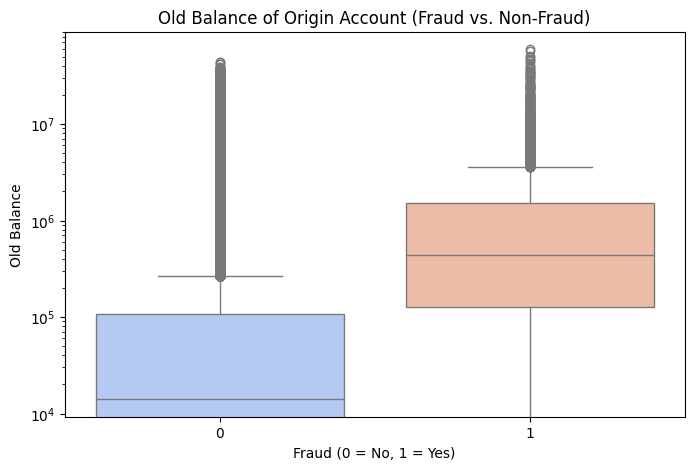

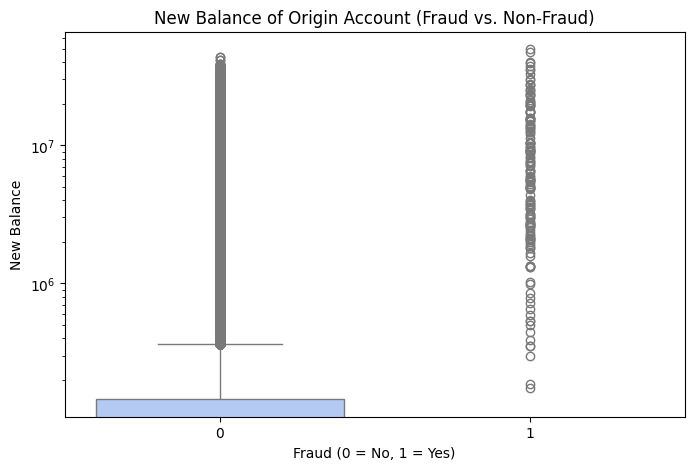

In [8]:
# Boxplot of Old Balance vs Fraud Status
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='isFraud', y='oldbalanceOrg', hue='isFraud', palette="coolwarm", legend=False)
plt.title("Old Balance of Origin Account (Fraud vs. Non-Fraud)")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Old Balance")
plt.yscale("log")  # Log scale for better visualization
plt.show()

# Boxplot of New Balance vs Fraud Status
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='isFraud', y='newbalanceOrig', hue='isFraud', palette="coolwarm", legend=False)
plt.title("New Balance of Origin Account (Fraud vs. Non-Fraud)")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("New Balance")
plt.yscale("log")
plt.show()


### Key Insights:
- **Fraudulent transactions tend to have significantly higher old balances** compared to non-fraudulent ones.
- Many **non-fraudulent transactions start with a low balance**, while fraud-related transactions often **involve accounts with high balances**.
- **New balances in fraud cases are often manipulated**, suggesting **fraudsters drain accounts completely**.
- **Many fraudulent transactions result in a near-zero balance**, confirming that fraudsters try to clean out funds.

## **Correlation Analysis**

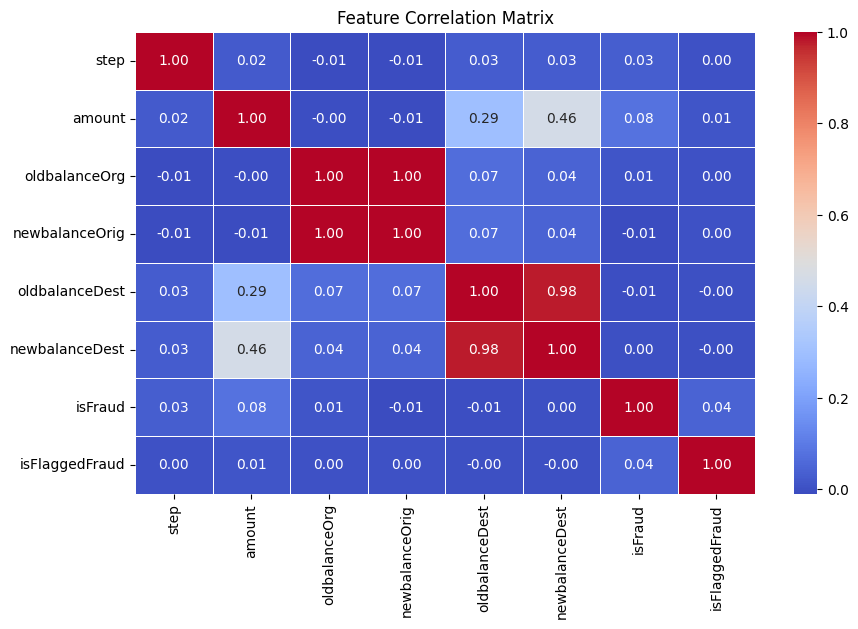

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


### Key Insights:
- **Transaction amount is weakly correlated (0.08) with fraud occurrence (`isFraud`)**, meaning fraud is not solely determined by transaction size.
- **Old and new balances (`oldbalanceOrg` and `newbalanceOrig`) are almost perfectly correlated (1.00)**, suggesting **balance changes play a crucial role in fraud detection**.
- **`oldbalanceDest` and `newbalanceDest` have a strong correlation (0.98)**, meaning destination account balances move together.
- **No single variable strongly correlates with `isFraud`**, indicating **fraud detection requires multiple factors** rather than just one key feature.

## **Chi-Square Test for Independence**

#### **Install Required Libraries**
* pip install matplotlib seaborn

In [11]:
import pandas as pd
import scipy.stats as stats

# Load dataset
df = pd.read_csv("./data/Synthetic_Financial_datasets_log.csv")  # Ensure you use the correct relative path

# Create a contingency table: Transaction Type vs Fraud Occurrence
contingency_table = pd.crosstab(df['type'], df['isFraud'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpretation
if p_value < 0.05:
    print("\nReject H₀: Fraud occurrence is dependent on transaction type.")
else:
    print("\nFail to reject H₀: Fraud occurrence is independent of transaction type.")


Chi-Square Statistic: 22082.54
P-Value: 0.0000
Degrees of Freedom: 4

Expected Frequencies Table:
isFraud              0            1
type                               
CASH_IN   1.397478e+06  1806.224400
CASH_OUT  2.234612e+06  2888.210753
DEBIT     4.137852e+04    53.481273
PAYMENT   2.148718e+06  2777.193740
TRANSFER  5.322211e+05   687.889834

Reject H₀: Fraud occurrence is dependent on transaction type.


### **Hypothesis Formulation:**
- **H₀ (Null Hypothesis):** Fraud occurrence is independent of transaction type.
- **H₁ (Alternative Hypothesis):** Fraud occurrence is dependent on transaction type.

### **Results:**
- **Chi-Square Statistic:** 22,082.54
- **P-Value:** 0.0000 (Highly significant)
- **Degrees of Freedom:** 4
- **Decision:** Reject H₀

### **Conclusion:**
- Fraud occurrence is **significantly dependent on transaction type**.
- **TRANSFER and CASH_OUT transactions** have the **highest fraud cases**.
- **PAYMENT and CASH_IN transactions** have **very few fraud cases**.
- Fraud detection models should **focus more on TRANSFER & CASH_OUT transactions** for better fraud prevention.